In [50]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from __future__ import absolute_import , division , print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os ,sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context('poster',font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [51]:
players = pd.read_csv(r'C:\Users\Ordinary\Desktop\redcard.csv')

In [52]:
players.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


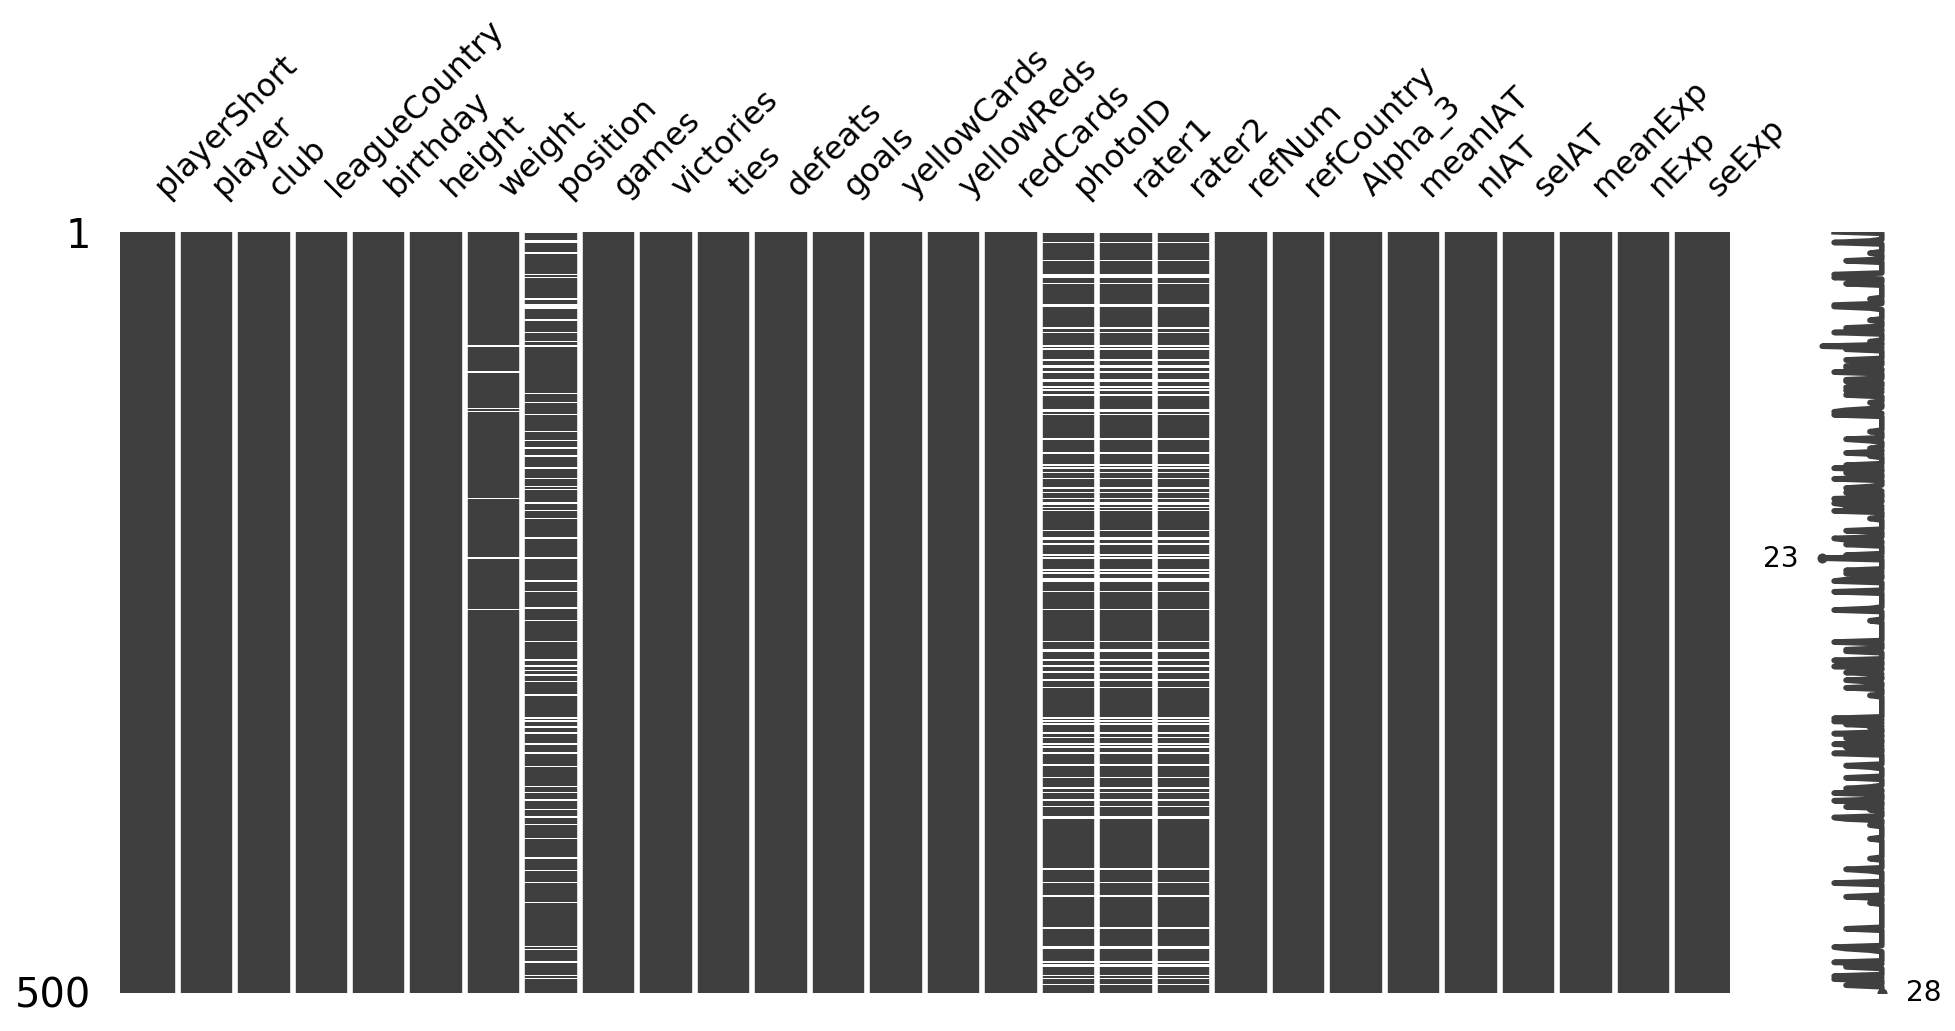

In [53]:
msno.matrix(players.sample(500),
           figsize=(16,7),
           width_ratios=(15,1))

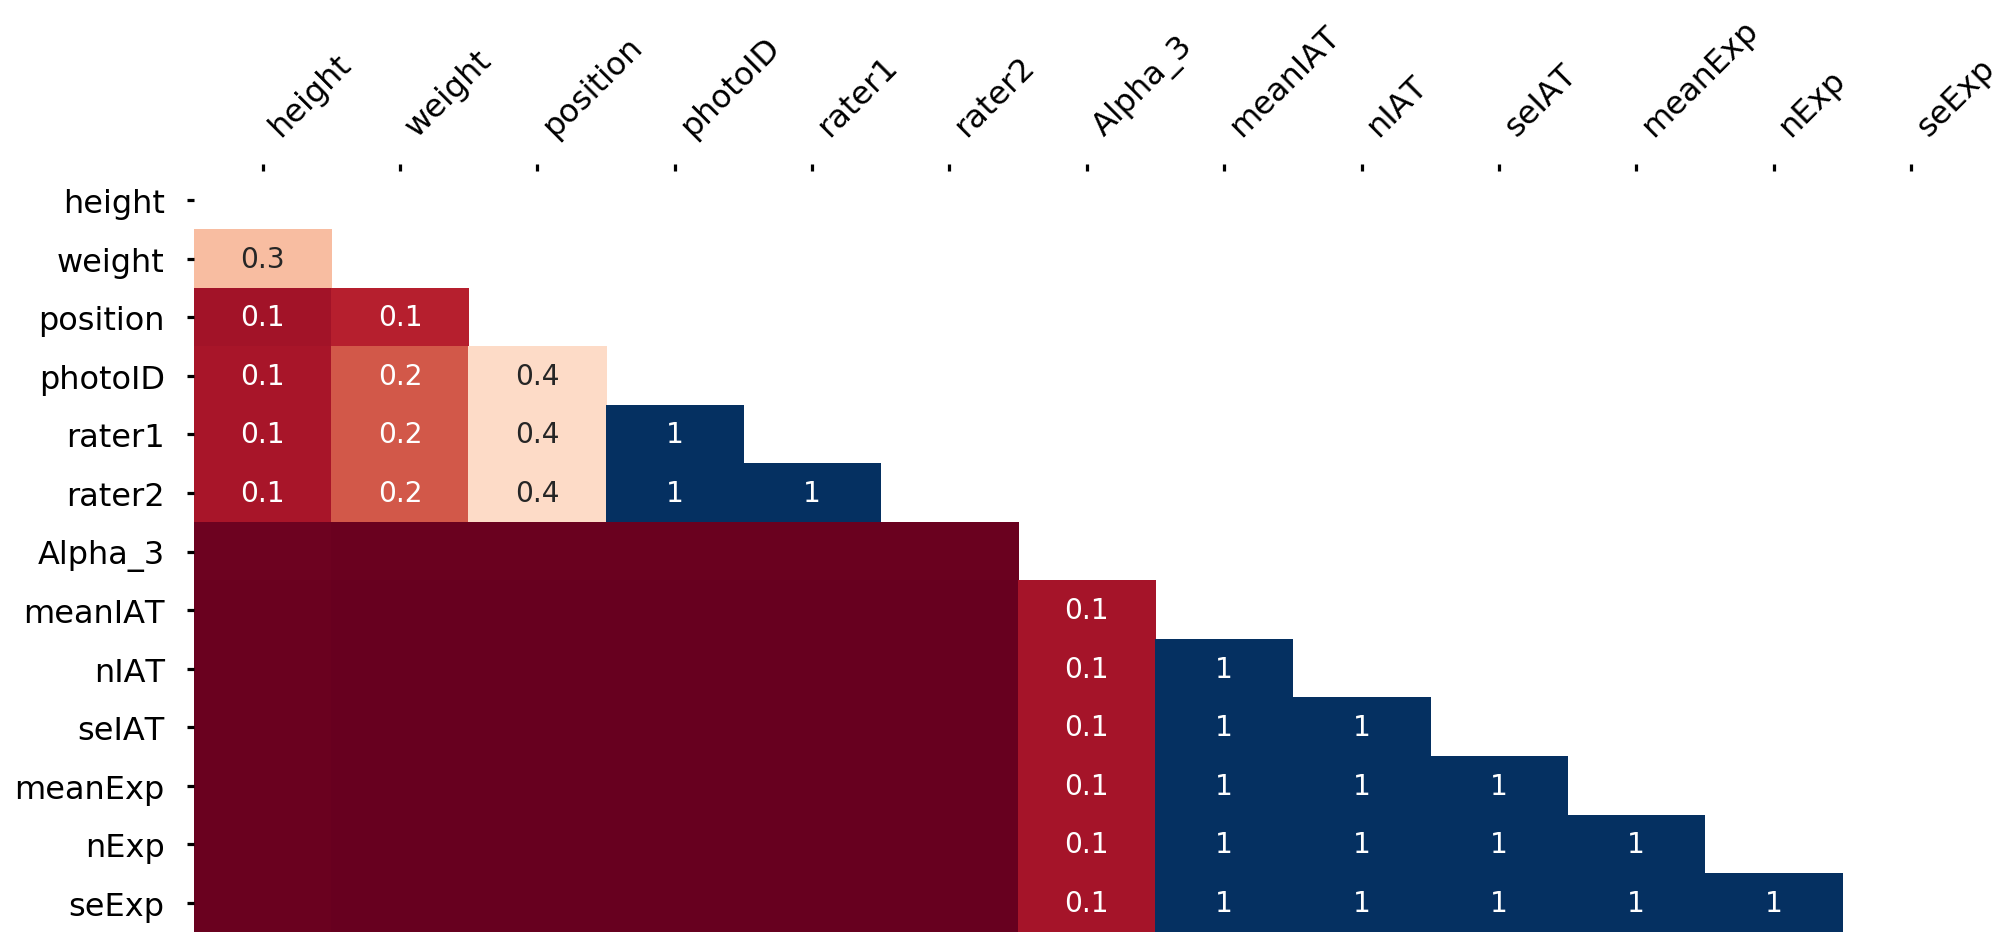

In [54]:
msno.heatmap(players,
            figsize=(16,7))

In [55]:
print('All players',len(players))
print('rater1 nulls:',len(players[(players.rater1.isnull())]))

All players 146028
rater1 nulls: 21407


In [56]:
players=players[players.rater1.notnull()]
players.shape[0]

124621

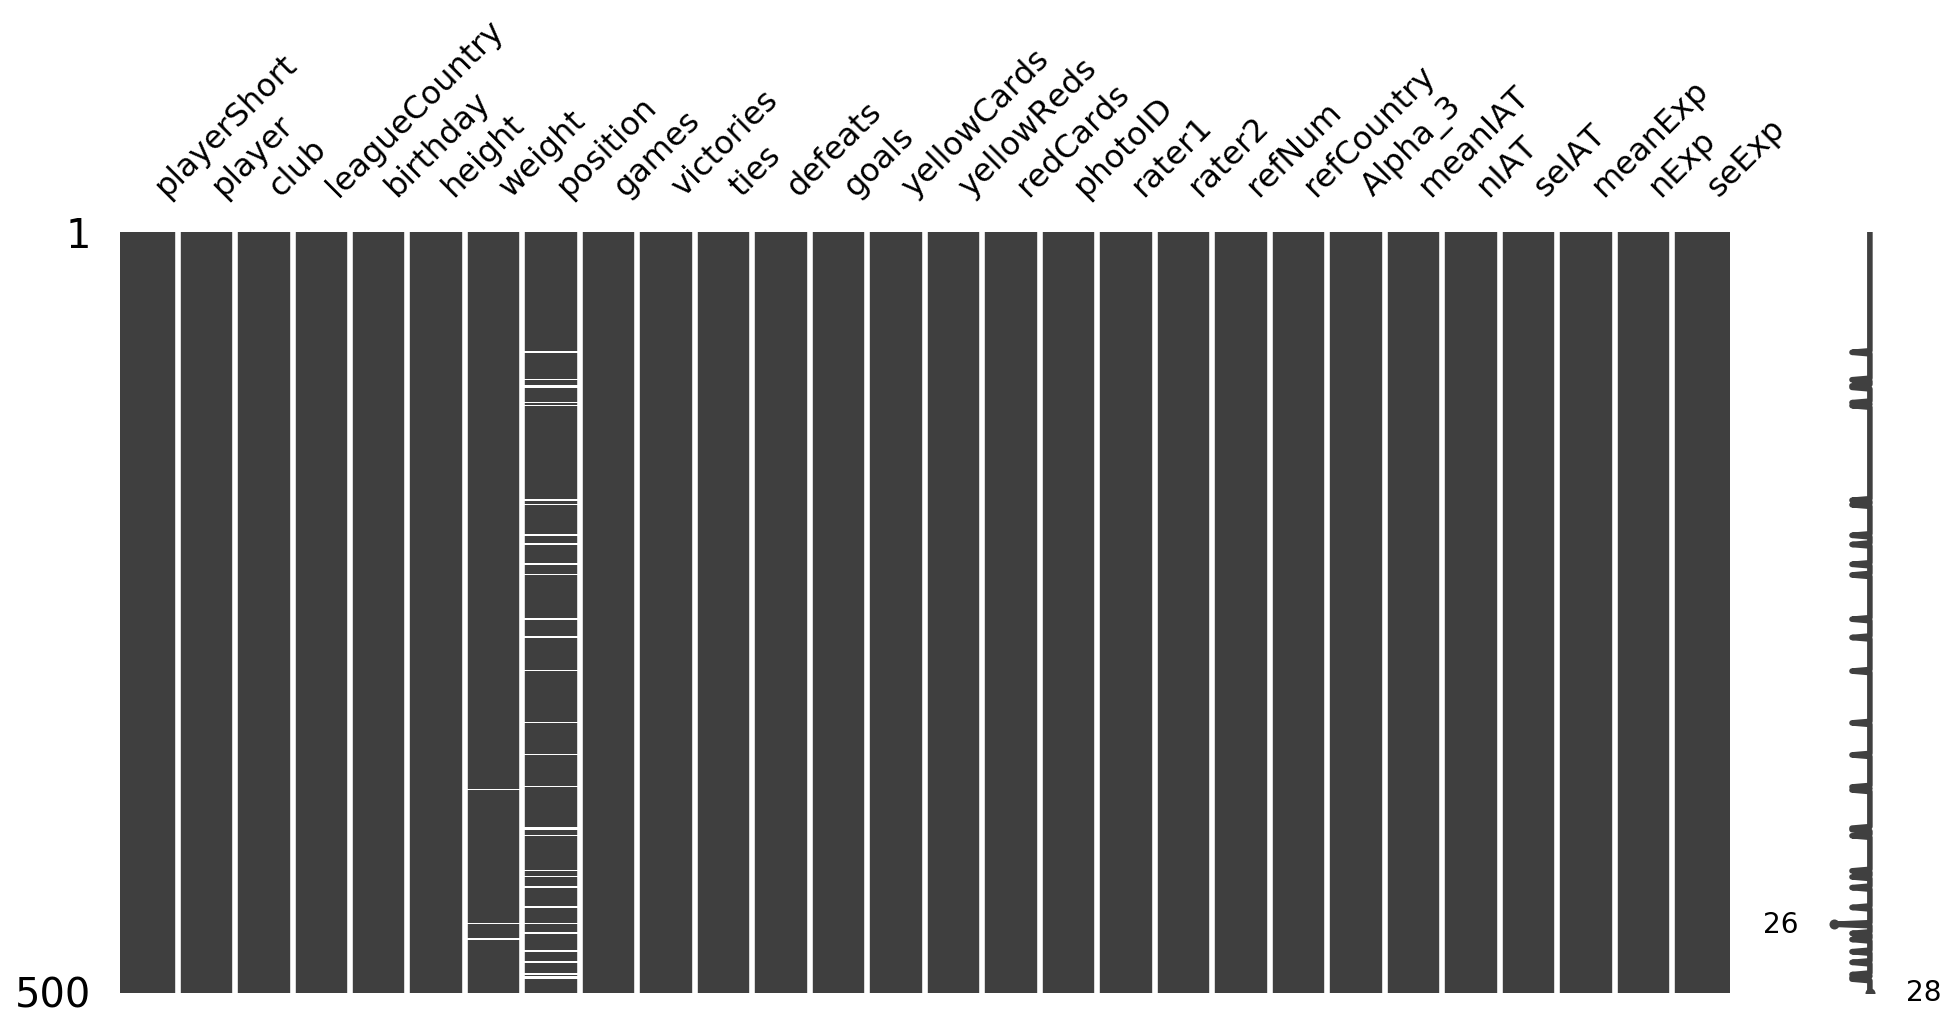

In [57]:
msno.matrix(players.sample(500),
           figsize=(16,7),
           width_ratios=(15,1))

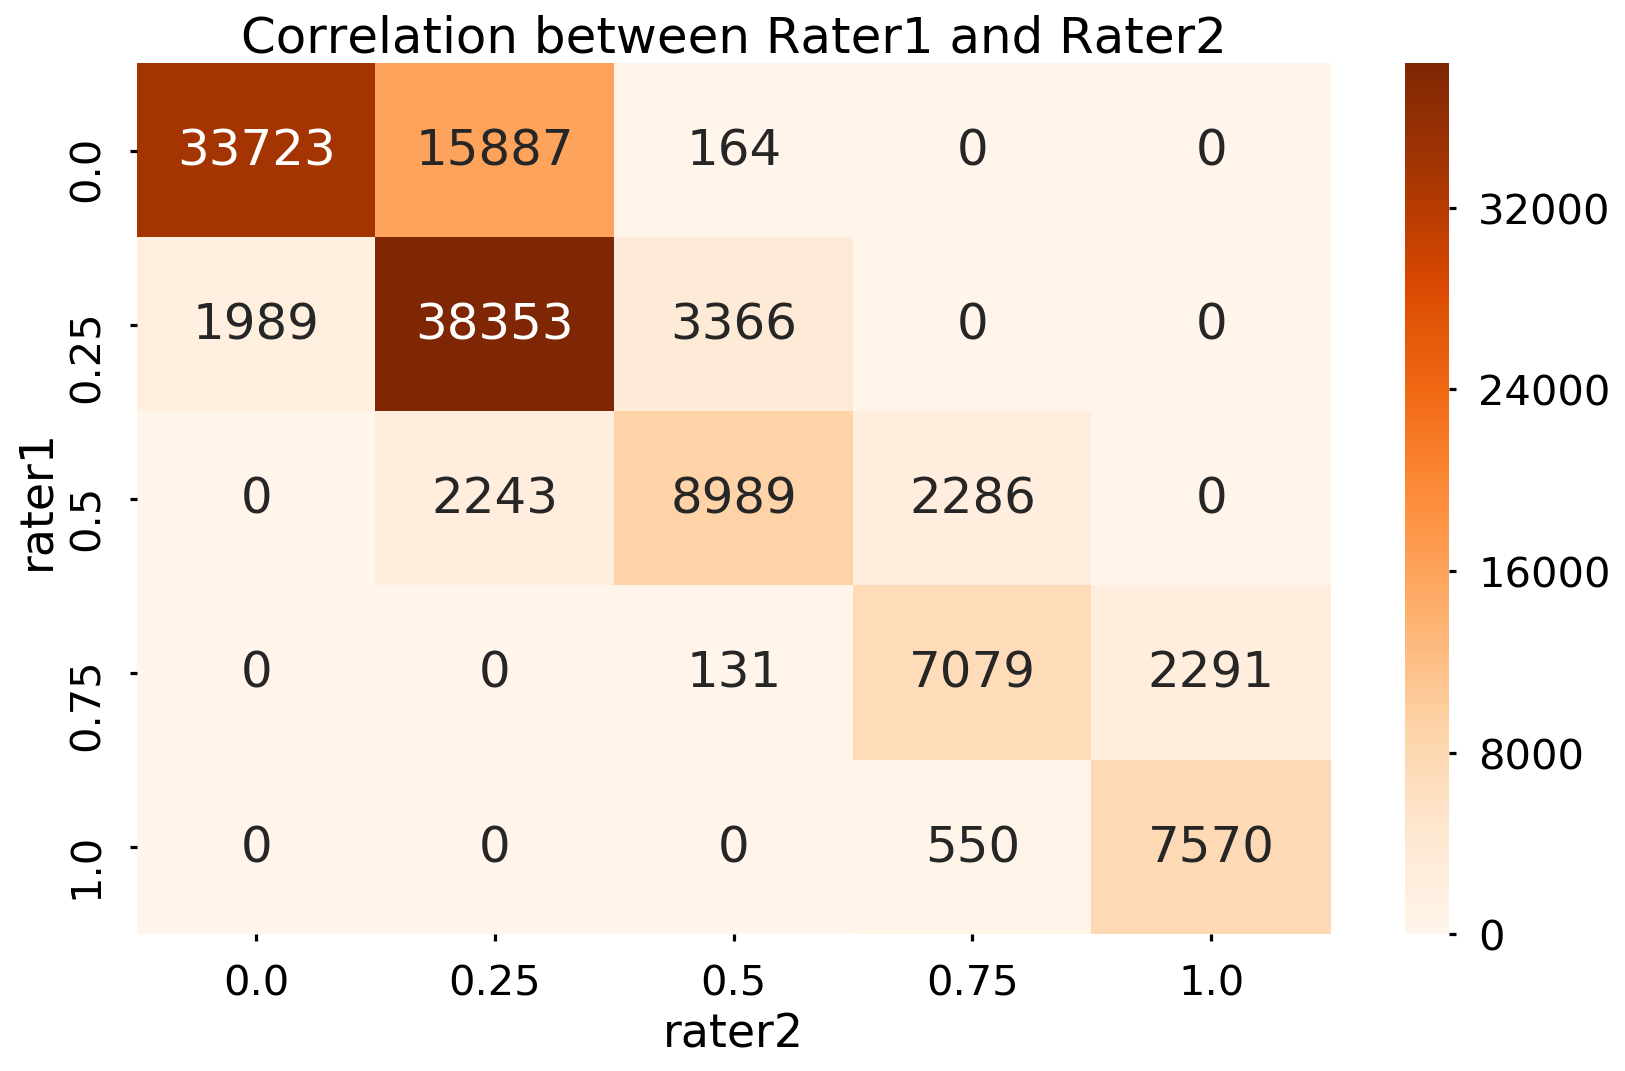

In [58]:
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(pd.crosstab(players.rater1,players.rater2),cmap='Oranges',
           annot=True,fmt='d',ax=ax)
ax.set_title('Correlation between Rater1 and Rater2')
fig.tight_layout()

In [59]:
pd.crosstab(players.rater1,players.rater2)

rater2,0.0,0.25,0.5,0.75,1.0
rater1,,,,,
0.00,33723,15887,164,0,0
0.25,1989,38353,3366,0,0
0.50,0,2243,8989,2286,0
0.75,0,0,131,7079,2291
1.00,0,0,0,550,7570


In [61]:
players['skintone']=players[['rater1','rater2']].mean(axis=1)
players

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.500
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000


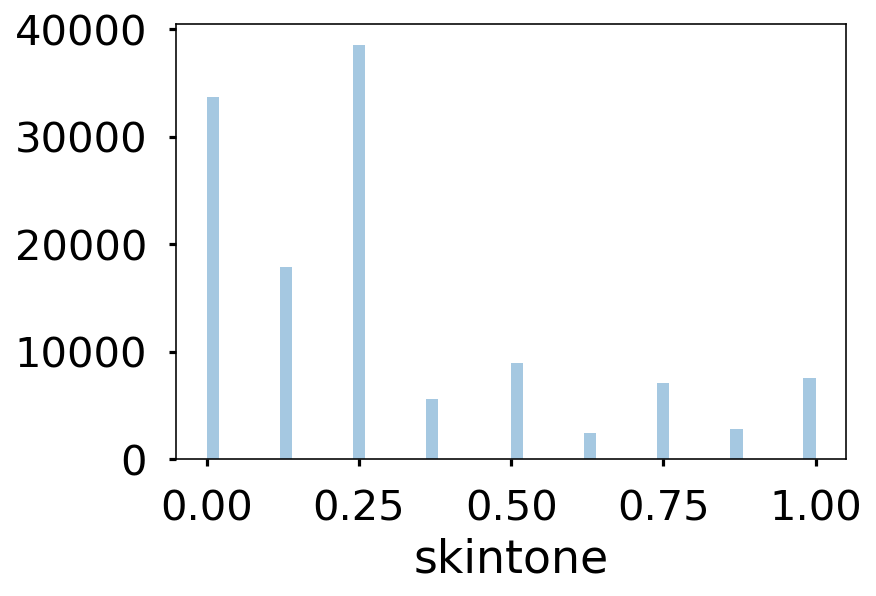

In [65]:
sns.distplot(players.skintone,kde=False)

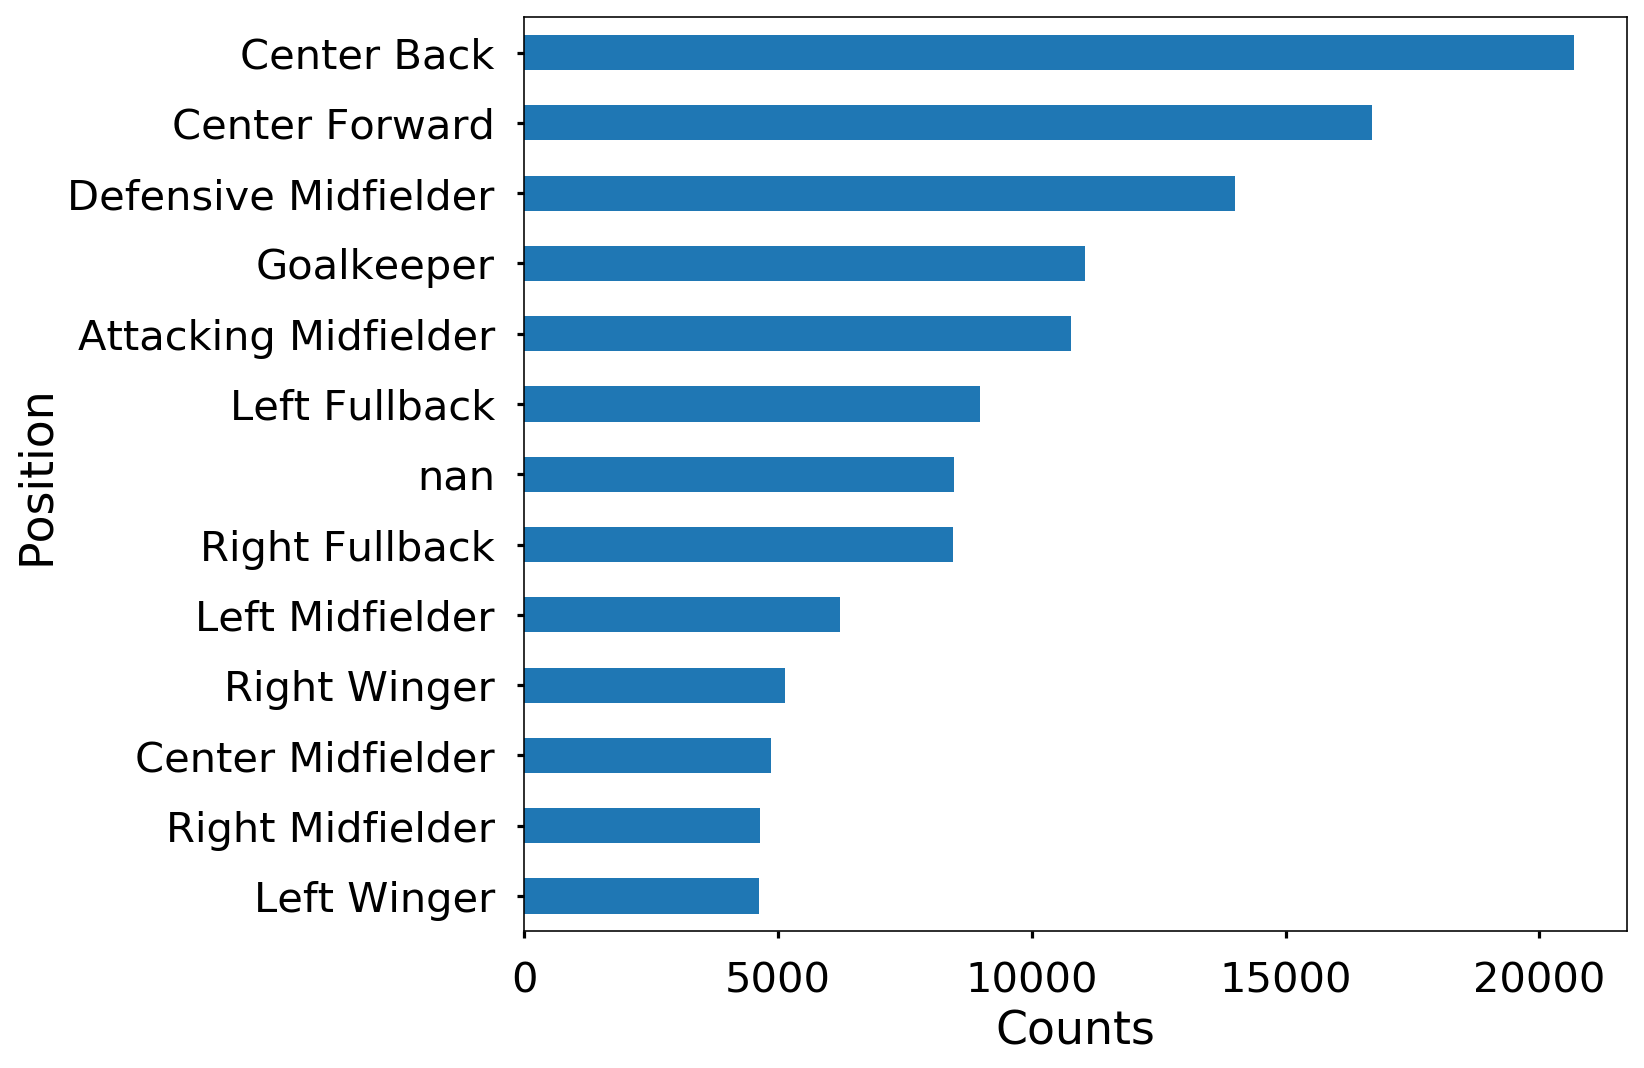

In [67]:
MIDSIZE=(12,8)
fig , ax =plt.subplots(figsize=MIDSIZE)
players.position.value_counts(dropna=False,ascending=True).plot(kind='barh',ax=ax)
ax.set_ylabel('Position')
ax.set_xlabel('Counts')
fig.tight_layout()

In [68]:
position_types=players.position.unique()
position_types

array(['Attacking Midfielder', 'Right Winger', 'Center Back',
       'Left Fullback', 'Defensive Midfielder', 'Goalkeeper',
       'Right Fullback', 'Left Winger', nan, 'Left Midfielder',
       'Center Midfielder', 'Right Midfielder', 'Center Forward'], dtype=object)

In [72]:
defense=['Attacking Midfielder', 'Right Winger', 'Center Back']
midfield=['Left Fullback', 'Defensive Midfielder', 'Goalkeeper']
forward=[ 'Right Fullback', 'Left Winger','Left Midfielder']
keeper=[ 'Center Midfielder', 'Right Midfielder', 'Center Forward']

players.loc[players['position'].isin(defense),'position_agg']='Defense'
players.loc[players['position'].isin(midfield),'position_agg']='Midfield'
players.loc[players['position'].isin(forward),'position_agg']='Forward'
players.loc[players['position'].isin(keeper),'position_agg']='Keeper'

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone,position_agg
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375,Defense
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750,Defense
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,Defense
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,Midfield
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000,Midfield
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250,Midfield
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,Forward
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,Forward
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.500,Forward
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,Defense


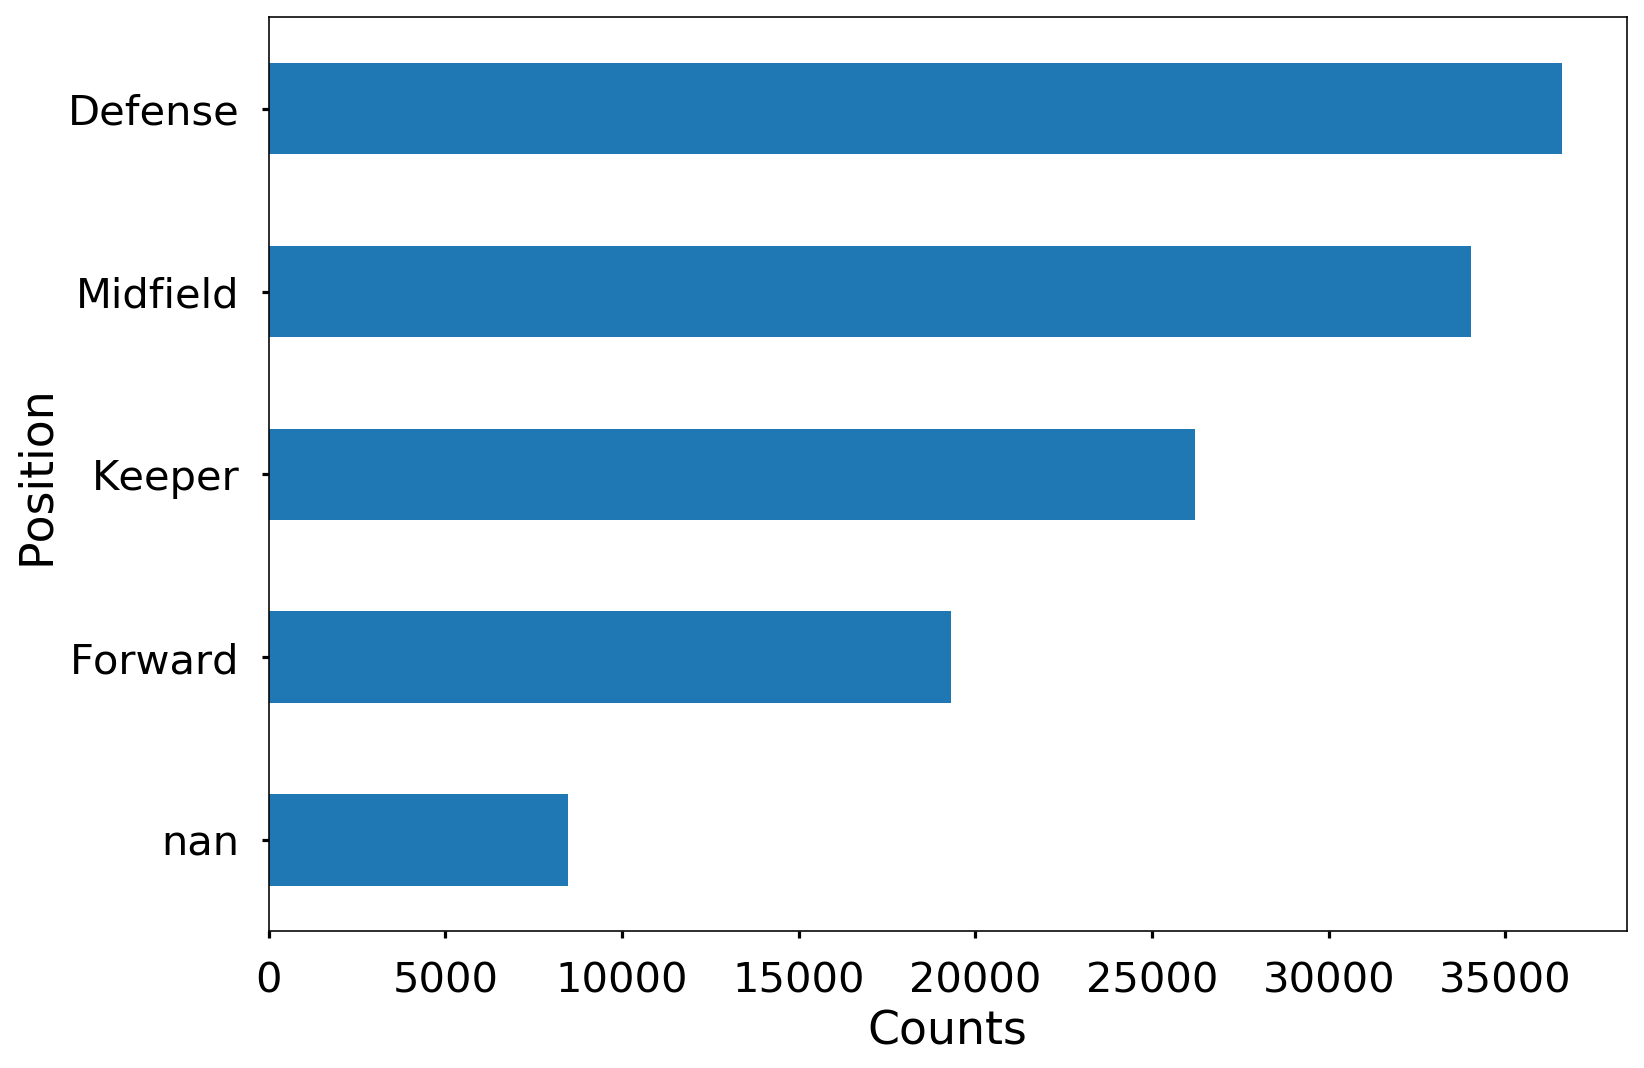

In [75]:
MIDSIZE=(12,8)
fig , ax =plt.subplots(figsize=MIDSIZE)
players['position_agg'].value_counts(dropna=False,ascending=True).plot(kind='barh',ax=ax)
ax.set_ylabel('Position')
ax.set_xlabel('Counts')
fig.tight_layout()

In [76]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E651498550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002E655DE44E0>]], dtype=object)

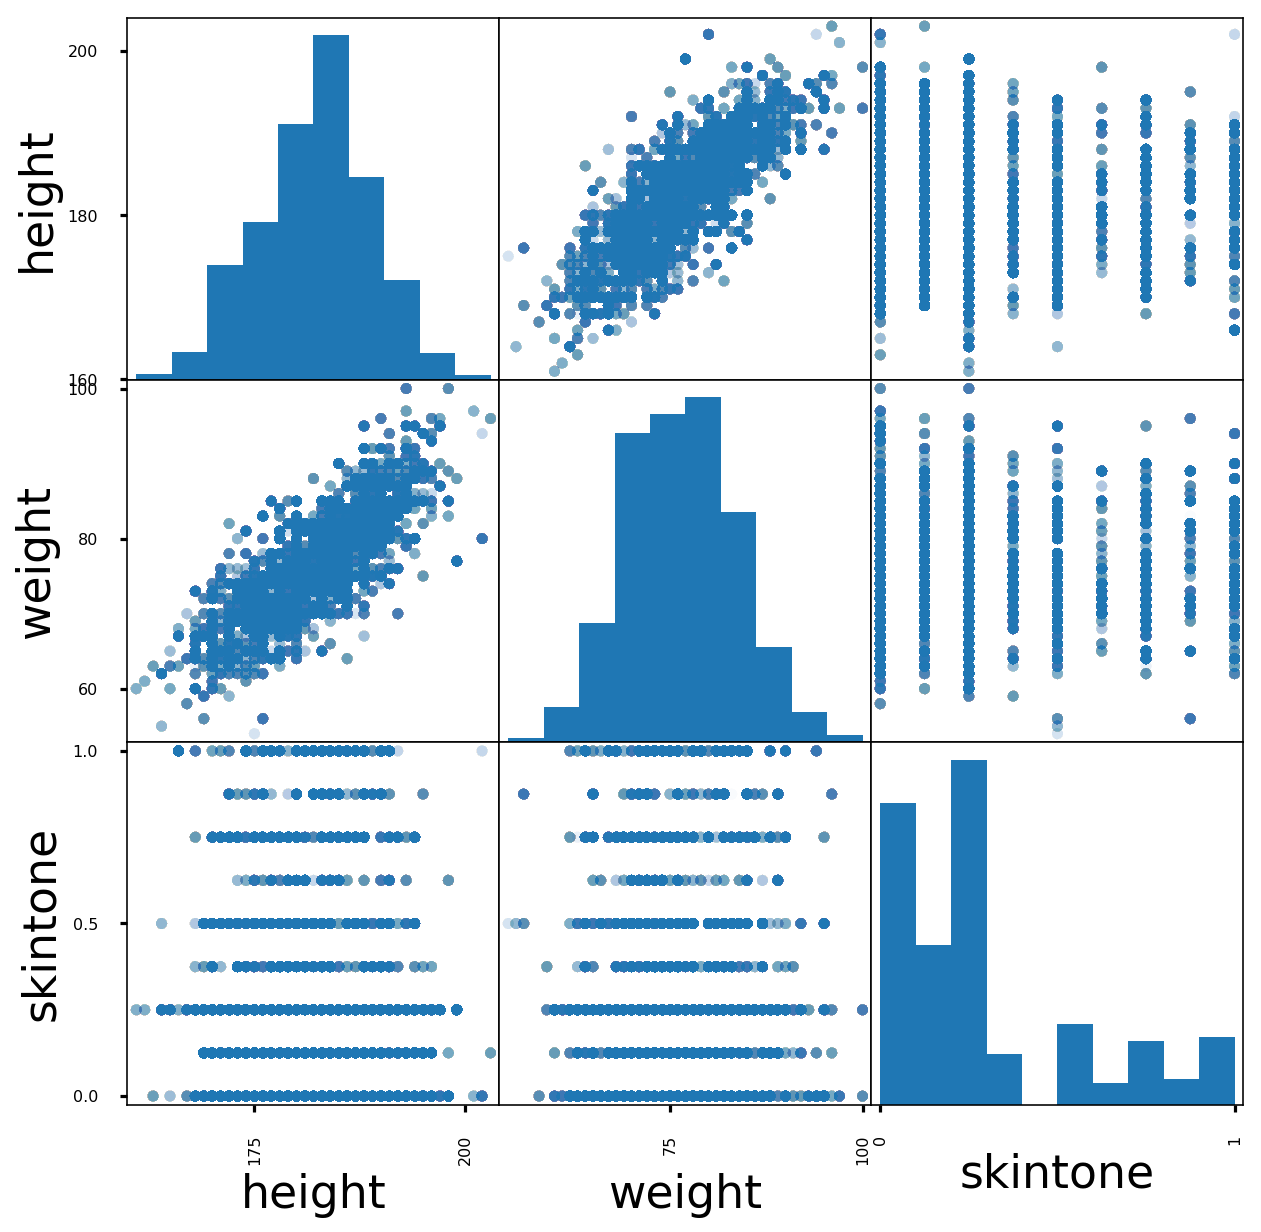

In [84]:
fig,ax=plt.subplots(figsize=(10,10))
scatter_matrix(players[['height','weight','skintone']],alpha=0.01,diagonal='hist',ax=ax)

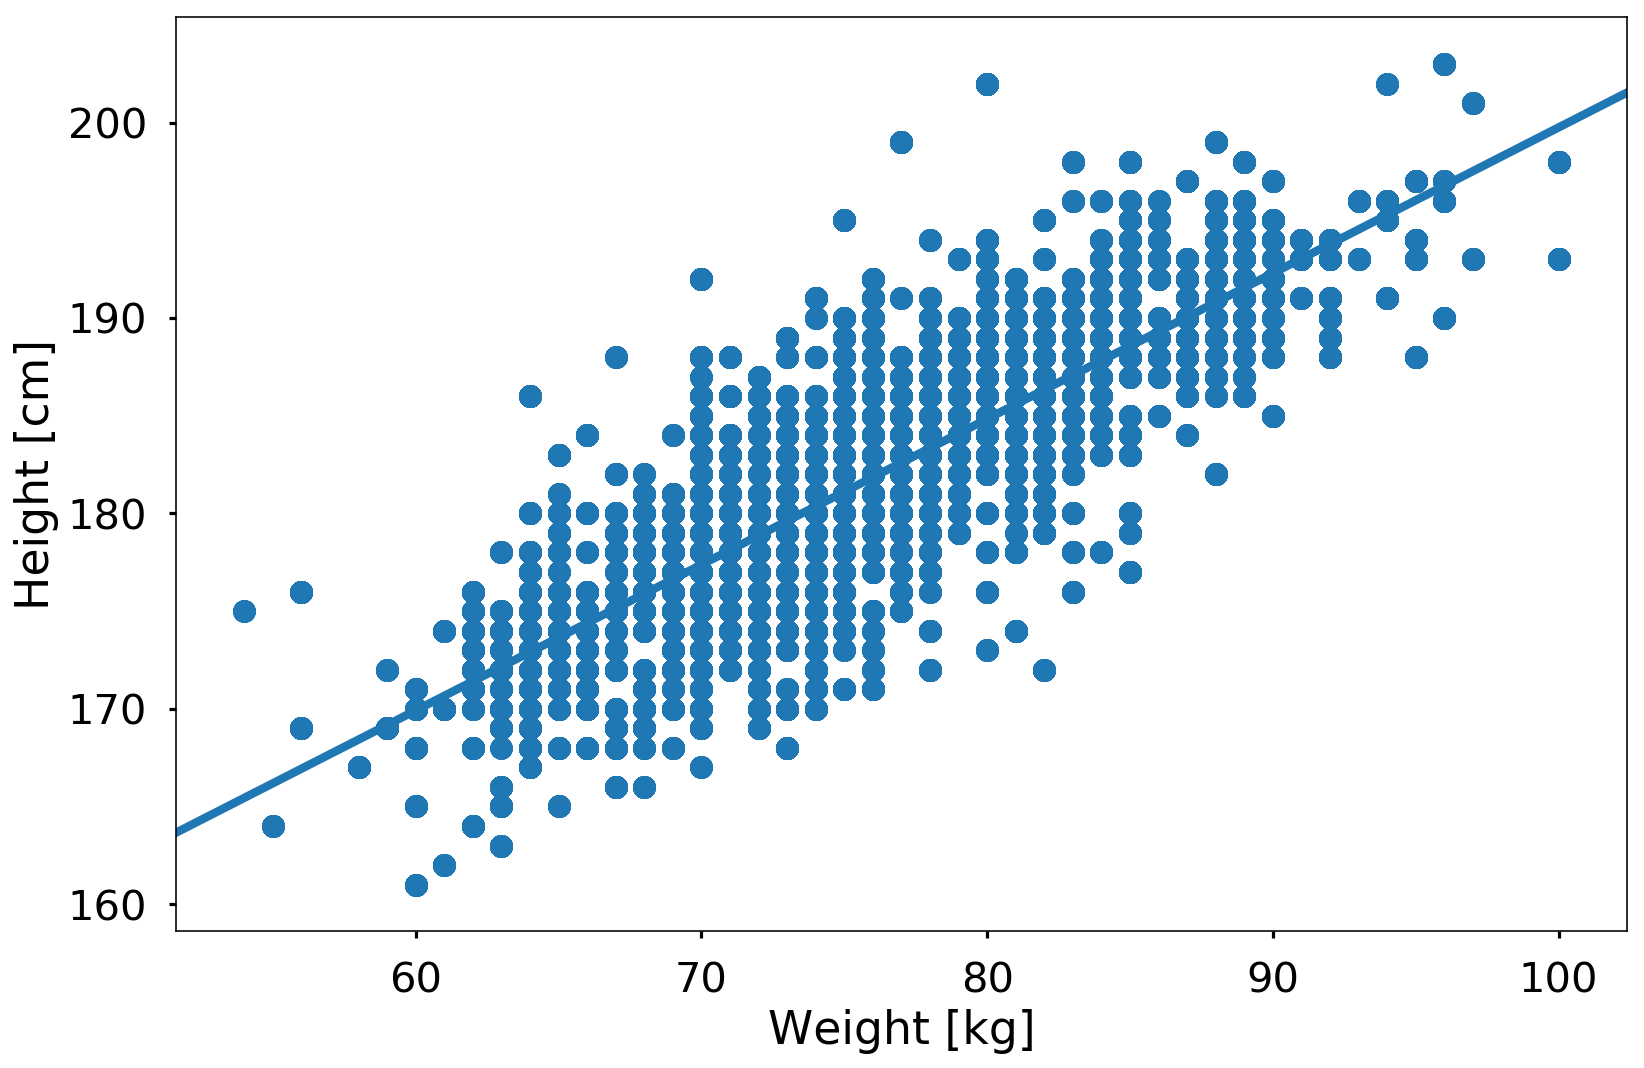

In [87]:
fig,ax=plt.subplots(figsize=MIDSIZE)
sns.regplot('weight','height',data=players,ax=ax)
ax.set_ylabel('Height [cm]')
ax.set_xlabel('Weight [kg]')
fig.tight_layout()

In [89]:
weight_categories=['vlow_weight',
                  'low_weight',
                  'mid_weight',
                  'high_weight',
                  'vhigh_weight']
players['weightclass']=pd.qcut(players['weight'],
                              len(weight_categories),
                              weight_categories)

In [90]:
players.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone,position_agg,weightclass
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375,Defense,low_weight
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750,Defense,high_weight
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,Defense,low_weight
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,Midfield,high_weight
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000,Midfield,vlow_weight


In [91]:
print(players['skintone'])
pd.qcut(players['skintone'],3)

0         0.375
1         0.750
5         0.125
6         0.125
7         1.000
8         0.250
9         0.000
10        0.000
11        0.500
12        0.000
13        0.000
14        0.125
15        0.000
16        0.500
17        0.000
18        0.000
19        0.125
20        0.125
21        0.000
22        0.000
23        0.000
24        0.125
25        0.250
26        0.125
27        0.125
28        0.000
29        0.125
30        0.000
31        0.000
32        0.000
          ...  
145998    1.000
145999    0.500
146000    0.875
146001    0.250
146002    0.250
146003    0.000
146004    1.000
146005    0.250
146006    0.125
146007    0.125
146008    0.625
146009    0.000
146010    0.250
146011    0.750
146012    0.000
146013    0.125
146014    0.125
146015    1.000
146016    0.000
146017    1.000
146018    0.000
146019    0.125
146020    0.000
146021    0.875
146022    0.500
146023    0.000
146024    0.375
146025    0.250
146026    0.500
146027    0.125
Name: skintone, Length: 

0             (0.25, 1.0]
1             (0.25, 1.0]
5         (-0.001, 0.125]
6         (-0.001, 0.125]
7             (0.25, 1.0]
8           (0.125, 0.25]
9         (-0.001, 0.125]
10        (-0.001, 0.125]
11            (0.25, 1.0]
12        (-0.001, 0.125]
13        (-0.001, 0.125]
14        (-0.001, 0.125]
15        (-0.001, 0.125]
16            (0.25, 1.0]
17        (-0.001, 0.125]
18        (-0.001, 0.125]
19        (-0.001, 0.125]
20        (-0.001, 0.125]
21        (-0.001, 0.125]
22        (-0.001, 0.125]
23        (-0.001, 0.125]
24        (-0.001, 0.125]
25          (0.125, 0.25]
26        (-0.001, 0.125]
27        (-0.001, 0.125]
28        (-0.001, 0.125]
29        (-0.001, 0.125]
30        (-0.001, 0.125]
31        (-0.001, 0.125]
32        (-0.001, 0.125]
               ...       
145998        (0.25, 1.0]
145999        (0.25, 1.0]
146000        (0.25, 1.0]
146001      (0.125, 0.25]
146002      (0.125, 0.25]
146003    (-0.001, 0.125]
146004        (0.25, 1.0]
146005      

In [92]:
pandas_profiling.ProfileReport(players)

Number of variables,32
Number of observations,124621
Total Missing (%),0.5%
Total size in memory,29.6 MiB
Average record size in memory,249.0 B
Numeric,17
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [93]:
players.birthday.head()

0    31.08.1983
1    08.01.1982
5    08.11.1979
6    10.11.1985
7    04.04.1986
Name: birthday, dtype: object

In [95]:
players['birth_date']=pd.to_datetime(players.birthday,format='%d.%m.%Y')
players['age_years']=((pd.to_datetime('2013-01-01')-players['birth_date']).dt.days)/365
players['age_years']

0         29.358904
1         31.002740
5         33.172603
6         27.161644
7         26.764384
8         28.739726
9         25.824658
10        28.953425
11        26.512329
12        24.857534
13        30.871233
14        28.068493
15        24.375342
16        25.983562
17        31.698630
18        23.331507
19        24.454795
20        23.183562
21        26.756164
22        25.016438
23        20.871233
24        23.821918
25        24.060274
26        24.230137
27        35.432877
28        31.219178
29        24.076712
30        25.813699
31        22.673973
32        28.019178
            ...    
145998    27.961644
145999    26.142466
146000    26.156164
146001    29.115068
146002    25.178082
146003    28.052055
146004    28.197260
146005    30.641096
146006    32.315068
146007    29.909589
146008    26.271233
146009    33.304110
146010    29.427397
146011    19.652055
146012    27.591781
146013    25.550685
146014    29.958904
146015    31.208219
146016    36.726027


In [96]:
players.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,nIAT,seIAT,meanExp,nExp,seExp,skintone,position_agg,weightclass,birth_date,age_years
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,712.0,0.000564,0.396000,750.0,0.002696,0.375,Defense,low_weight,1983-08-31,29.358904
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,40.0,0.010875,-0.204082,49.0,0.061504,0.750,Defense,high_weight,1982-01-08,31.002740
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,127.0,0.003297,0.538462,130.0,0.013752,0.125,Defense,low_weight,1979-11-08,33.172603
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,127.0,0.003297,0.538462,130.0,0.013752,0.125,Midfield,high_weight,1985-11-10,27.161644
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,127.0,0.003297,0.538462,130.0,0.013752,1.000,Midfield,vlow_weight,1986-04-04,26.764384


In [98]:
(players.groupby(level=1)
        .sum()
        .sort_values('redcard',ascending=False)
        .rename(columns={redcard:'total recards received'})).head()

ValueError: level > 0 or level < -1 only valid with  MultiIndex

In [99]:
players.sample(replace=True,n=1000).groupby('skintone').mean()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,age_years
skintone,,,,,,,,,,,,,,,,,,,,,
0.000,182.699275,76.452899,2.742754,1.206522,0.652174,0.884058,0.326087,0.427536,0.018116,0.003623,...,0.000000,1507.663043,27.445652,0.348344,11834.721014,0.000281,0.462184,12356.626812,0.001366,27.353087
0.125,183.006494,76.870130,3.493506,1.512987,0.805195,1.175325,0.500000,0.441558,0.012987,0.012987,...,0.222403,1487.980519,25.500000,0.352733,9395.727273,0.000423,0.479118,9795.357143,0.002235,27.555737
0.250,181.813953,76.791946,3.375415,1.521595,0.840532,1.013289,0.365449,0.475083,0.013289,0.009967,...,0.250831,1552.710963,30.607973,0.350072,11059.710963,0.000816,0.497976,11568.757475,0.002444,28.419087
0.375,181.088235,76.647059,3.205882,1.235294,0.705882,1.264706,0.441176,0.558824,0.000000,0.000000,...,0.389706,1341.205882,27.735294,0.357566,5091.705882,0.000361,0.538360,5320.794118,0.001782,26.843836
0.500,180.897436,74.571429,2.692308,1.243590,0.551282,0.897436,0.346154,0.307692,0.000000,0.012821,...,0.500000,1471.435897,31.666667,0.347790,11160.551282,0.000668,0.473653,11646.846154,0.003659,26.420162
0.625,180.857143,74.250000,2.535714,1.071429,0.785714,0.678571,0.392857,0.178571,0.000000,0.000000,...,0.732143,1085.464286,33.178571,0.348512,10519.214286,0.000434,0.506603,10989.214286,0.002264,26.224951
0.750,182.446429,77.709091,2.839286,1.214286,0.803571,0.821429,0.321429,0.410714,0.017857,0.000000,...,0.750000,1394.678571,30.303571,0.340844,46269.785714,0.001439,0.453207,47736.946429,0.006683,27.153082
0.875,180.166667,76.666667,3.944444,1.722222,1.222222,1.000000,0.444444,0.555556,0.000000,0.000000,...,0.930556,1908.055556,37.722222,0.333696,10164.333333,0.000832,0.414947,10641.888889,0.004488,27.766971
1.000,182.309091,76.462963,2.800000,1.145455,0.709091,0.945455,0.200000,0.381818,0.036364,0.000000,...,1.000000,1611.072727,37.763636,0.342280,16321.709091,0.000558,0.446260,17086.363636,0.003003,27.016139


In [105]:
ax=sns.regplot(players.index.values,
              y='redcard',
              data=players,
              lowess=True,
              scatter_kws={'alpha':0.4},
              x_jitter=(0.125/4.0))
ax.set_xlabel('Skintone')

KeyError: 'redcard'